In [ ]:
from keras import Model
from keras.layers import Input, Dense
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = pd.DataFrame( (np.random.randn(1000,2)), columns=["A", "B"] )
X["B"] = (X["A"]) *6

In [ ]:
plt.plot(X.A, X.B, "o")

In [ ]:
def relu(x):
    return(x * (x > 0))

Yes. Keras initializes some negative and some positive weights, randomly by default -- you can also specify how the weights are initialized [link] (https://keras.io/initializers/). I think that you're right that some nodes could be dead at the start, if the incoming weights sum up to a value less than 0

In [ ]:
################# CUSTOM LOSS FUNCTION ########################

In [ ]:
from keras import Model
from keras.layers import Input, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from keras.backend import clear_session
clear_session()

from keras import losses

def my_loss(y_true, y_pred):
    final_loss = (losses.binary_crossentropy(y_true[:, 0], y_pred[:, 0]) + 
                    y_true[:, 0] * 
                  losses.categorical_crossentropy(y_true[:, 1:], y_pred[:,1:]))
    return final_loss

In [ ]:
from keras.layers import Concatenate
XX = pd.DataFrame( (np.random.randn(1000,2)), columns=["A", "B"] )
XX["B"] = (XX["A"]) *6 + XX["B"]
yy = np.random.randn(1000, 2)

n = 2

input_layer = Input(shape=(n, ))
shared = Dense(32)(input_layer)
sub1 = Dense(16)(shared)
sub2 = Dense(16)(shared)
y1 = Dense(1, activation='sigmoid')(sub1)
y2 = Dense(4, activation='softmax')(sub2)
mergedOutput = Concatenate()([y1, y2])


In [ ]:
model = Model(input_layer, mergedOutput)
model.summary()

model.compile(optimizer='adam', loss=my_loss)
yy.shape

In [ ]:
Trainmod = model.fit(x=XX, y=yy, epochs=10, batch_size=2**6)
# plt.plot(XX.A, X.B, "o", label = "actual")
# plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o", label = "preds")

#plt.legend()

In [ ]:
model.predict(np.array([[13, .12]]))

In [ ]:
np.array(XX)

In [ ]:



def disemvowel(string):
    message = []
    vowels = ['a', 'e', 'i', 'o', 'u']
    for letter in string:
         if letter not in vowels:
                message.append(letter)
    return (message)

disemvowel("Leol")

In [ ]:
aeInput = Input((2,))
encode = Dense(2, activation='relu')(aeInput)
aeOutput = Dense(2, activation='relu')(encode)

In [ ]:
import keras.backend as K

# examples of custom loss functions
def my_loss(y_true, y_pred):
    # this example is mean squared error
    # works if if y_pred and y_true are greater than 1D
    return K.mean(K.square(y_pred - y_true))

def my_loss(y_true, y_pred):
    # calculate mean(abs(y_pred1*y_pred2 - y_true1*ytrue2)) 
    return K.mean(K.abs(K.prod(y_pred, axis = 1) - K.prod(y_true, axis = 1)))

AE = Model(aeInput, aeOutput, name="autoencoder")
AE.compile(optimizer='adam', loss=my_loss, )

In [ ]:
import tensorflow as tf

y_true = np.random.rand(100, 2) + 1
y_pred = np.random.rand(100, 2) + 1

my_loss(y_true, y_pred) # tensor
print(tf.Session().run(K.mean(my_loss(y_true, y_pred))))

In [ ]:
wts = [np.array([[4,  5 ],
        [2, 6]], dtype="float32"),
 np.array([ 0, 0], dtype="float32"),
 np.array([[1, 1],
        [1, 1 ]], dtype="float32"),
 np.array([0, 0  ], dtype="float32")]

AE.set_weights(wts)

In [ ]:

AE.get_weights()

In [ ]:
TrainAE = AE.fit( x=X, y=X, epochs=10, batch_size=2**6)
plt.plot(X.A, X.B, "o", label = "actual")
plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o", label = "preds")

plt.legend()

In [ ]:
AE.evaluate(X, X)

In [ ]:
import tensorflow as tf

y_true = X.astype("float32")
y_pred = AE.predict(X).astype("float32")

print(tf.Session().run((my_loss(y_true, y_pred))))

In [ ]:
y_true = X
y_pred = AE.predict(X)

my_loss(y_true, y_pred) # tensor
print(tf.Session().run(K.mean(my_loss(y_true, y_pred))))

In [ ]:
AE.predict(X).shape

In [ ]:
wts = AE.get_weights()
wts = [np.array([[-0,  -0 ],
        [ -0, -0]], dtype="float32"),
 np.array([ 0, 0], dtype="float32"),
 np.array([[ 0,  0 ],
        [ 0 , 0 ]], dtype="float32"),
 np.array([0, 0  ], dtype="float32")]

AE.set_weights(wts)

In [ ]:
wtsConcatenated = [np.vstack([wts[ii + 1], wts[ii]]) for ii in np.arange(0, len(wts), 2)]

In [ ]:
AE.predict(np.array([[-0.9, -0.33]]))

In [ ]:
AE.predict(X).shape

In [ ]:
LayerValues = []
    
inputData= np.array([[1, -0.9, -0.33]])
LayerValues.append(inputData)

jj = 0

wtsConcatenated = [np.vstack([wts[ii + 1], wts[ii]]) for ii in np.arange(0, len(wts), 2)]

nextLayer = np.dot(LayerValues[jj], wtsConcatenated[jj]).astype("float32")
nextLayer = np.hstack([np.array([1], dtype = "float32").reshape(-1,1), nextLayer] )
nextLayer = relu(nextLayer) # apply relu
print(nextLayer)
jj = 1
nextLayer = np.dot(np.array([nextLayer]), wtsConcatenated[jj]).astype("float32")
relu(nextLayer)

In [ ]:
plt.plot(X.A, X.B, "o", label = "actual")
plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o", label = "preds")

plt.legend()

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.kdeplot( X.A, X.B, shade=False, axis=ax)
sns.kdeplot(AE.predict(X)[:,0], AE.predict(X)[:,1], shade=False, axis=ax)

In [ ]:
plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o")

In [ ]:
from PIL import Image
import numpy as np
from pylab import imshow, show, get_cmap
from numpy import random

Z = random.random((50,50))   # Test data

imshow(Z, cmap=get_cmap("Spectral"), interpolation='nearest')
plt.savefig('your_file.tif')

In [ ]:
import cv2

BLACK_MIN = np.array([0, 20, 20], np.uint8)
BLACK_MAX = np.array([120, 255, 255], np.uint8)
imgg = cv2.imread('your_file.tif', 1)
dst = cv2.inRange(imgg, BLACK_MIN, BLACK_MAX)

no_black = cv2.countNonZero(dst)

print('The number of black pixels is: ' + str(no_black))

In [ ]:
imgg

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(imgg)

In [ ]:
#### More custom losses

In [ ]:
from keras import Model
from keras.layers import Input, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
%matplotlib inline

In [ ]:
class Losses:
    def IoULoss(targets, inputs, smooth=1e-6):
        #targets = K.flatten(targets)
#         inputs = K.reshape(inputs, [1, -1]) # 1 row, as many columns as needed
#         targets = K.reshape(targets, [-1, 1]) # 1 column, as many rows as needed
        inputs = K.reshape(inputs, [1, -1]) # 1 row, as many columns as needed
        targets = K.reshape(targets, [-1, 1]) # 1 column, as many rows as needed
        print(inputs.shape, targets.shape)
        print(K.sum(K.dot(targets, inputs)).shape)
        
        intersection = K.sum(K.dot(targets, inputs))
        total = K.sum(targets) + K.sum(inputs)
        union = total - intersection

        IoU = (intersection + smooth) / (union + smooth)
        return 1 - IoU

aeInput = Input((2,))
encode = Dense(2, activation='relu')(aeInput)
aeOutput = Dense(2, activation='relu')(encode)
model = Model(aeInput, aeOutput)

model.compile(loss=Losses.IoULoss, optimizer="adam",
                      metrics=["accuracy"])

In [ ]:
XX = pd.DataFrame( (np.random.randn(1000,2)), columns=["A", "B"] )
XX["B"] = (XX["A"]) *6 + XX["B"]
yy = np.random.randn(1000, 2)

model.fit(XX, yy)

In [ ]:
import tensorflow as tf
import numpy as np

xx = np.random.randn(100)
xx = np.asarray(xx, np.float32)

xx_tf = tf.convert_to_tensor(xx, np.float32)
xx_tf = K.reshape(xx_tf, [-1, 1])
print(xx_tf.shape)

yy = np.random.randn(100)
yy = np.asarray(yy, np.float32)

yy_tf = tf.convert_to_tensor(xx, np.float32)
yy_tf = K.reshape(yy_tf, [1, -1])
K.dot(xx_tf, yy_tf)

In [ ]:
xx_tf = K.reshape(xx_tf, [1, -1])
yy_tf = K.reshape(yy_tf, [-1, 1])


print(tf.Session().run(Losses.IoULoss(xx_tf, yy_tf)))

In [ ]:
np.dot(np.random.rand(100), np.random.rand(100))

In [ ]:
x = K.random_uniform_variable(shape=(100, 1), low=0, high=1)
y = K.random_uniform_variable(shape=(1, 100), low=0, high=1)
xy = K.dot(x, y)

In [ ]:
x2 = K.flatten(y)
x2.shape

In [ ]:
x.shape

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state = 123)

# fit supervised KNN classifier
knn = KNeighborsClassifier()
knn.fit(X, y) 

# create 50 new data points
# with the same number of features as the training set
new_data = np.random.randn(50, 2)

# predict new labels
new_labels = knn.predict(new_data)

# plot training clusters
plt.plot(X[y== 1, 0], 
         X[y==1,1], 
         "C1o", label = "training cluster 1")
plt.plot(X[y== 0, 0], 
         X[y==0,1], 
         "C0o", label = "training custer 2")

# plot predictions on new data
plt.plot(new_data[new_labels== 1, 0], 
         new_data[new_labels==1,1], 
         "ro", label = "new data assigned to cluster 1")
plt.plot(new_data[new_labels== 0, 0], 
         new_data[new_labels==0,1], 
         "bo", label = "new data assigned to cluster 2")
plt.legend()

In [ ]:
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier

knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 



knn.predict(iris_X_test)

iris_y_test

In [ ]:
import random 
import time

players = input("Let's play Five's! How many are you?:" )
#print("you are", players, "players?") #test number of players
players = int(players)

In [ ]:
if players <=1:
    print("Game Over")

else:
    while players >= 1:
        #players = players+1

#Decide possible values than can be chosen
        options = [] #Possible options
        for i in range(0,players):
            x = i * 5
            options.append(x)
        print("Your choices are", options)

#Playing the game
#Each turn
        guess = random.choice(options)
        print("Computer has chosen", int(guess))
        count_down = 3
        while (count_down):
            print(count_down)
            time.sleep(1)
            count_down -=  1
        choice = input("Guess:")
        choice = int(choice)
        if choice not in options: #If choice isn't a multiple of 5
            input("Not allowed, choose again:")
        elif choice in options and choice != guess: #Valid choice but wrong
                print("Wrong")                      #so player is still in the
        else:                                       #game
            choice = int(choice)
            if choice == guess: #Correct choice so player leaves game
                print("You're Out.") # this should reduce the player count
        players -=1

In [ ]:
import numpy as np

def next_batch(X,y,batchsize):
    for i in np.arange(0,X.shape[0],batchsize):
        yield(X[i:i+batchsize],y[i:i+batchsize])

def des(X,y,learning_rate,epoches, batchsize):
    X=np.c_[np.ones((X.shape[0])),X]
    W=np.random.uniform(size=(X.shape[1],))
    lossHistory=[]
    for epoch in np.arange(0,epoches):
        epochLoss=[]
        for (batchX,batchY) in next_batch(X,y,batchsize):
            #batchY = batchY.reshape(-1)
            preds=batchX.dot(W)
            print(preds.shape, batchY.shape)
            error=preds-batchY
            loss=np.sum(error**2)
            epochLoss.append(loss)
            gradient=batchX.T.dot(error)/batchX.shape[0]
            W+=-learning_rate*gradient
    lossHistory.append(np.average(epochLoss))
    return W,lossHistory

In [ ]:
from sklearn.model_selection import train_test_split
data = np.random.randn(150,13)
target = np.random.randn(150)

train_data_intercept = np.insert(data, 0, 1, axis=1) 
train_data,test_data,train_target,test_target = train_test_split(train_data_intercept,(target[:, np.newaxis]), test_size=0.2, random_state=42)
#train_data,test_data,train_target,test_target = train_test_split(data,target, test_size=0.2, random_state=42)
train_data.shape, train_target.shape


In [ ]:
w, loss = des(train_data,train_target,0.01,10,32)
w, loss

In [ ]:
import pandas as pd
pd.DataFrame(train_data)

In [ ]:
from keras import Model
from keras.layers import Input, Dense, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
%matplotlib inline

# Model.add(LSTM(32, input_shape=(5,2), return_sequences=True, activation='tanh'))


In [ ]:
trainx = np.random.randn(5, 5000)
trainx.shape[:-1]

input_layer = Input(shape = (5, 1))
l1 = LSTM(32, activation='tanh')(input_layer)
y1 = Dense(1, activation='softmax')(l1)

model = Model(input_layer, y1)
trainx.shape

In [ ]:
model.compile(optimizer='adam', loss="mean_squared_error")
model.summary()

In [ ]:
Trainmod = model.fit(x=trainx, y=trainx, epochs=2, batch_size=2**6)

In [ ]:
visible = Input(shape=(100,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())

In [ ]:
model.compile(optimizer='adam', loss="mean_squared_error")

In [ ]:

# refref here
trainx = np.random.randn(5, 23, 1)
trainy = np.random.randn(5, 1, )

visible = Input(shape=(23,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
model.compile(optimizer='adam', loss="mean_squared_error")

model.fit(x=trainx, y=trainy, epochs=2)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.DataFrame({"GFS": [np.nan, np.nan, 1, 2, np.nan, 
                          2, 3, np.nan, np.nan, 4], 
                    "RAP": [-2.45832646,  0.56266567, -0.4453474 , 
                            -0.85447845, -1.34830127,
                            -0.38113925, -0.41400397,  
                            np.nan, -0.78764545, -0.02807674]})

fh = np.array(["Fri 4 am", "Fri 6 am","Fri 8 am","Fri 10 am",
                "Fri 6 pm","Fri 10 pm","Sat 4 am","Sat 6 am",
                "Sat 8 am","100az 10 am"
                ])

gfs = df['GFS']
rap = df['RAP']


fig2, ax2 = plt.subplots(figsize=(10,8))

# workaround to set the order of xlabels
ax2.plot(fh, [np.nan]*len(fh)) 

# remove nan's  so that the points are connected
ax2.plot(fh[~np.isnan(gfs)], gfs[~np.isnan(gfs)], "ob-") 
ax2.plot(fh[~np.isnan(rap)],rap[~np.isnan(rap)],marker='x')

ax2.tick_params(which='major',labelsize='12')
ax2.grid(which='major', color='#CCCCCC', linestyle='-')
plt.xticks(rotation='90')
plt.xlabel('Forecast Run')
plt.ylabel('Snowfall Accumulation (in.)')

In [ ]:
~np.isnan(gfs)

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import optimizers

import numpy as np
import copy



# data
data = np.random.randn(20000, 2001) + 100# read my input samples. They are 1d functions of time and I have 2000 of them.
# Each function has 2001 time components

# shuffling data before training
import random
random.seed(5)
random.shuffle(data)

# split training (1500 samples) and testing (500 samples) dataset
X_train = data[:1500]
X_test = data[1500:]

# normalize training and testing set using mean and std deviation of training set
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std

X_test -= X_mean
X_test /= X_std


### MODEL ###

# Architecture

# input layer
input_shape = [X_train.shape[1]]
X_input = Input(input_shape)

# hidden layers

x = Dense(1000, activation='tanh', name='enc0')(X_input)
encoded = Dense(500, activation='tanh', name='enc1')(x)
encoded_2 = Dense(200, activation='tanh', name='enc2')(encoded)
encoded_3 = Dense(50, activation='tanh', name='enc3')(encoded_2)
decoded_2 = Dense(200, activation='tanh', name='dec2')(encoded_3)
decoded_1 = Dense(500, activation='tanh', name='dec1')(decoded_2)
x2 = Dense(1000, activation='tanh', name='dec0')(decoded_1)

# output layer
decoded = Dense(input_shape[0], name='out')(x2)

# the Model
model = Model(inputs=X_input, outputs=decoded, name='autoencoder')

# optimizer
opt = optimizers.Adamax()
model.compile(optimizer=opt, loss='mse', metrics=['acc'])
print(model.summary())

###################

In [ ]:
### TRAINING ###

epochs = 200
# train the model
history = model.fit(x = X_train, y = X_train,
                    epochs=epochs,
                    batch_size=2000,
                    validation_split=0.2)  # using 20% of training samples for validation

In [ ]:
# Testing 
prediction = model.predict(X_test)
for i in range(len(prediction)):
    prediction[i] = np.multiply(prediction[i], X_std) + X_mean

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_ = np.arange(epochs)
plt.figure()
plt.plot(epochs_, loss, 'bo', label='Training loss')
plt.plot(epochs_, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.close()

In [ ]:
from keras import losses

In [ ]:
import tensorflow as tf
from keras import losses
prediction = model.predict(X_test)
print(np.mean(tf.Session().run(losses.mean_squared_error(X_test, prediction))))


In [ ]:
((prediction - X_test)**2).mean(axis=None)

In [ ]:
import tensorflow as tf
prediction = model.predict(X_test)
for i in range(len(prediction)):
    prediction[i] = np.multiply(prediction[i], X_std) + X_mean
print(np.mean(tf.Session().run(losses.mean_squared_error(X_test, prediction))))


In [ ]:
prediction = model.predict(X_train)
print(np.mean(tf.Session().run(losses.mean_squared_error(X_train, prediction))))

In [ ]:
xx = np.arange(0, 6000)
yy = np.linspace(-0.2,1, num = len(xx))

In [ ]:
plt.figure(figsize = [6, 5])
plt.plot(xx, yy, "w")

In [ ]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt


df = pd.DataFrame({"x": [0,1,2,3,4,5,6], 
                  "y": np.array([1, 2, 4, 8, 16, 32, 64]) + 10})

def func(x, a, b, c):
    return a*np.exp(x*b) + c

def func(x, a, b):
    return a*np.exp(x*b)

popt, pcov = curve_fit(func, df['x'].values, df['y'].values, )

In [ ]:
popt

In [ ]:
plt.plot(df.x, df.y)
x_pred = np.linspace(0, 6, 100)

# y_pred = func(x_pred, popt[0], popt[1], popt[2])
y_pred = func(x_pred, popt[0], popt[1])
plt.plot(x_pred, y_pred)

In [ ]:
x_pred = np.linspace(0, 6, 100)

y_pred = func(x_pred, popt[0], popt[1])

In [ ]:
plt.plot(x_pred, y_pred)

In [ ]:
df.to_dict()

In [ ]:
# Interview question from Insurance company
#### Write a function to calculate the sum of digits in an integer


# here's what I wrote in the interview
def int_sum(integer):
    int_string = "".split(str(integer)) 
    int_list = [int(i) for i in int_string]
    return(sum(int_list))
    
int_sum(645)

In [ ]:
# here's a correct way to do it:
def int_sum(integer):
    int_string = list(str(integer)) 
    int_list = [int(i) for i in int_string]
    return(sum(int_list))
    
int_sum(645)

In [ ]:
##### Question 2 -- write  a function that takes a list of integers
##### and returns True if two integers in the list add up to a target integer
import numpy as np

# here's what I wrote
def int_sum(list_of_ints, target):
    
    for ii in range(len(list_of_ints)):
        for jj in np.arange(ii, len(list_of_ints)):
            if list_of_ints[ii] + list_of_ints[jj] == target:
                # print(ii, jj)
                return(True)
    
    return(False)
    
    
    
int_sum([1,2,5], 4)

In [ ]:
# the above was close, but not quite right
# here's what I wrote
def int_sum(list_of_ints, target):
    
    for ii in range(len(list_of_ints)):
        for jj in np.arange(ii + 1, len(list_of_ints)): # this line was wrong above
            if list_of_ints[ii] + list_of_ints[jj] == target:
                # print(ii, jj)
                return(True)
    
    return(False)

int_sum([1,2,3], 4)

In [ ]:
# example question:  Return true if there is a pallindrome anywhere in the list.

In [ ]:
from skimage import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


xx = np.random.randn(100, 2)

housing = pd.DataFrame({"latitude": np.random.randn(100) - 100, 
                       "longitude": np.random.randn(100) - 100, 
                       "median_house_value" : np.random.randn(100), 
                       "size": np.random.randint(100)})


img = io.imread(r"C:\Users\calli\Documents\R\win-library\3.5\naivebayes\help\figures\logo.png")
fig, ax  = plt.subplots(1,1,figsize=(12,8))

sns.scatterplot(x="latitude", y="longitude", hue="median_house_value", size='size' ,data=housing, palette="jet", zorder=2)
plt.imshow(img, origin = "upper", extent = [0, 120, 0, 120])

plt.show()

In [ ]:
plt.imshow(img)
ax = sns.scatterplot(x="latitude", y="longitude", 
                hue="median_house_value", size='size' ,data=housing, palette="jet")
plt.show()

In [ ]:
import urllib
import matplotlib.pyplot as plt

# create a file-like object from the url
f = urllib.request.urlopen("https://i.stack.imgur.com/1z6A0.png")

# read the image file in a numpy array
a = plt.imread(f)
plt.imshow(a, extent = [0, 500, 0, 500])
plt.show()

In [ ]:
import urllib
import matplotlib.pyplot as plt

# create a file-like object from the url
f = urllib.request.urlopen("https://i.stack.imgur.com/JXxJM.png")

# read the image file in a numpy array
a = plt.imread(f)
plt.imshow(a, extent = [0, 500, 0, 500])
plt.show()

In [ ]:
from skimage.filters import threshold_otsu

from skimage.color import rgb2gray


grayscale = rgb2gray(a)
global_thresh = threshold_otsu(grayscale)
binary_global = grayscale > global_thresh
plt.figure(figsize=[10,10])
plt.imshow(binary_global)

In [ ]:
from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary_global, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=[10,10])
ax.imshow(binary_global, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [ ]:
from skimage.morphology import dilation, binary_dilation, erosion, binary_erosion
from skimage.morphology import disk

In [ ]:
selem = disk(30)
eroded = binary_erosion(binary_global, selem)

In [ ]:
plt.figure(figsize = [10,10])
grayscale = eroded*grayscale
plt.imshow(grayscale)

In [ ]:
selem = disk(1)
dilated = binary_dilation(eroded, selem)


In [ ]:
plt.imshow(dilated)
plt.show()
plt.imshow(binary_global)

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(np.logical_xor(dilated, eroded)*1)

In [ ]:
from scipy.signal import convolve2d
bb  =  convolve2d(grayscale,np.array([[1,1,1], [1, 0, 1], [1, 1, 1]])/8, mode = "same")
plt.imshow(bb)

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(grayscale + np.logical_xor(dilated, binary_global)*bb)

In [ ]:
plt.imshow(np.logical_xor(dilated, eroded))

In [ ]:
x, y = np.where(np.logical_xor(dilated, eroded) == 1)
plt.plot(x, y, "o")

In [ ]:
g2 = grayscale.copy()

for ii in zip(x,y):
    grayscale[ii[0], ii[1]] = (np.sum(grayscale[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]*
                                                                 dilated[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]) / 
                                                           np.sum(dilated[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]))

In [ ]:
plt.imshow(grayscale)

In [ ]:
plt.figure(figsize = [10,10])
plt.imshow(grayscale - g2)

In [ ]:
plt.imshow(grayscale)

In [ ]:
from scipy.ndimage.filters import convolve
bb  =  convolve(grayscale,np.array([[1,1,1], [1, 0, 1], [1, 1, 1]])/8, mode = "same")
plt.imshow(bb)


In [48]:
# get original image
import urllib
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import  binary_dilation, binary_erosion
from skimage.morphology import disk
from skimage.color import rgb2gray

# create a file-like object from the url
f = urllib.request.urlopen("https://i.stack.imgur.com/JXxJM.png")

# read the image file in a numpy array
a = plt.imread(f)

In [49]:
# convert to greyscale and add padding 0's
grayscale = np.pad(rgb2gray(a), 100, mode = "constant")
global_thresh = 0.2
binary_global = grayscale > global_thresh

# erode by 5 px to get rid of edge effects
eroded = binary_erosion(binary_global, disk(5))
binary_global = eroded

# turn everything less than the threshold to 0
grayscale = grayscale * binary_global


In [50]:
num_px_to_expand = 80

for jj in range(80):

    # get ring of pixels to update
    px_to_update = np.logical_xor(binary_dilation(binary_global, disk(1)), binary_global)

    # update those pixels with the average of their neighborhood
    x, y = np.where(px_to_update == 1)
    for ii in zip(x,y):
        grayscale[ii[0], ii[1]] = (np.sum(grayscale[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]*
                                                                     binary_global[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]) / 
                                                               np.sum(binary_global[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]))       
    # increase binary_global by 1 px dilation
    binary_global = binary_dilation(binary_global, disk(1))

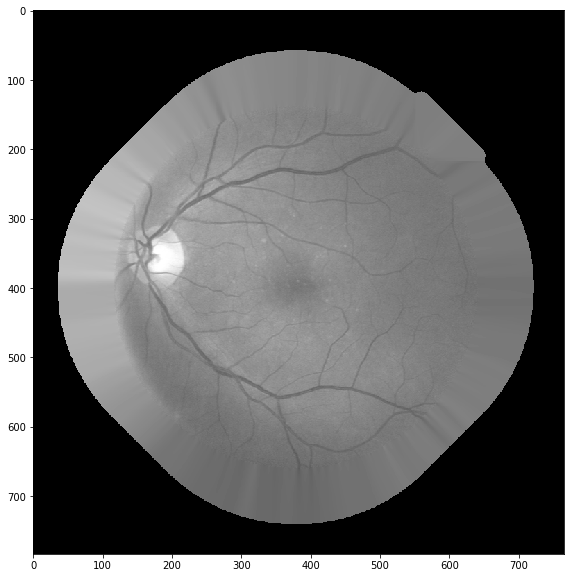

In [51]:
plt.figure(figsize=[10,10])
plt.imshow(grayscale, cmap=plt.cm.gray)

In [41]:
# try with color
# get original image
import urllib
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import  binary_dilation, binary_erosion
from skimage.morphology import disk
from skimage.color import rgb2gray

# create a file-like object from the url
f = urllib.request.urlopen("https://i.stack.imgur.com/JXxJM.png")

# read the image file in a numpy array
a = plt.imread(f)

C:\Users\calli\Anaconda3\envs\opencv2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


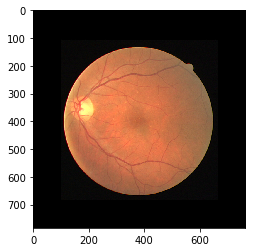

In [42]:
# convert to greyscale and add padding 0's

a = np.pad(a, ((100,100), (100,100), (0,0)), mode = "constant")

plt.imshow(a)
for channel in range(3):
    one_channel = a[:, :, channel]
    global_thresh = 0.2
    binary_global = one_channel > global_thresh

    # erode by 5 px to get rid of edge effects
    eroded = binary_erosion(binary_global, disk(5))
    binary_global = eroded

    # turn everything less than the threshold to 0
    one_channel = one_channel * binary_global

    num_px_to_expand = 50

    for jj in range(num_px_to_expand):

        # get ring of pixels to update
        px_to_update = np.logical_xor(binary_dilation(binary_global, disk(1)), binary_global)

        # update those pixels with the average of their neighborhood
        x, y = np.where(px_to_update == 1)
        for ii in zip(x,y):
            a[ii[0], ii[1], channel] = (np.sum(one_channel[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]*
                                                                         binary_global[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]) / 
                                                                   np.sum(binary_global[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]))       
        # increase binary_global by 1 px dilation"
        binary_global = binary_dilation(binary_global, disk(1))

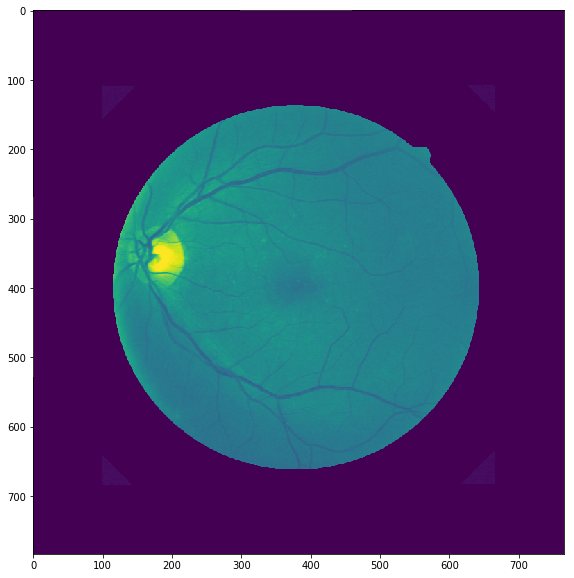

In [46]:
plt.figure(figsize=[10,10])
plt.imshow(a[:,:, 1])

In [44]:
np.sum(binary_global[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)])

5

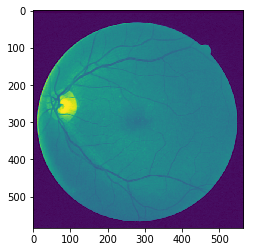

In [38]:
channel = 1
one_channel = a[:, :, channel]
global_thresh = 0.2
binary_global = one_channel > global_thresh
plt.imshow(one_channel)

C:\Users\calli\Anaconda3\envs\opencv2\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\calli\Anaconda3\envs\opencv2\lib\site-packages\matplotlib\axes\_axes.py:6149: RuntimeWarning: invalid value encountered in less
  xmin = min(xmin, xi.min())
C:\Users\calli\Anaconda3\envs\opencv2\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\calli\Anaconda3\envs\opencv2\lib\site-packages\matplotlib\axes\_axes.py:6150: RuntimeWarning: invalid value encountered in greater
  xmax = max(xmax, xi.max())


ValueError: max must be larger than min in range parameter.

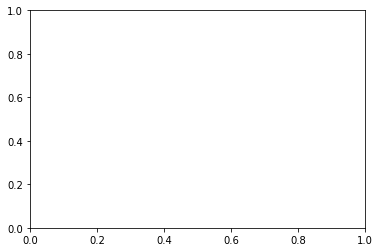

In [45]:
plt.hist(a.reshape(-1))

In [ ]:
ii = (32, 266)
binary_global[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]